# 3.8 MLP

多层感知机(multilayer perceptron,MLP)

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。

多层感知机的层数、隐藏层中隐层单元个数都是超参数。

MLP按照以下方式计算输出：

$$
H=\phi()XW_h=b_h\\
O=HW_o+b_o
$$
> 其中，$\phi$表示激活函数，在分类问题中，
可以对O做softmax运算，并使用softmax回归中的
crossentropy loss。

## 激活函数
全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，这个非线性函数被称为激活函数（activation function）。

几个常用的激活函数：

In [1]:
# 加载相关包

import torch
import numpy as np 
import matplotlib.pyplot  as plt  
import sys
sys.path.append("..")
import d2l_pytorch as d2l 

In [23]:
# 绘图
from IPython import display

def xyplot(x,y,name):
    # x值, y值, 函数名
    # 以SVG格式，显示
    display.set_matplotlib_formats('svg')
    # 绘图
    # x.detach()表示抛弃所保存的梯度值
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name+'(x)') 

### 1-RELU函数

RELU(rectified linear unit), 该函数定义为：

$$
RELU(X)=max(x,0)
$$

绘制Relu函数图：

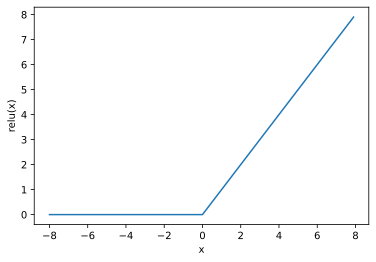

In [16]:
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
# torch.arange()返回类型为： <class 'torch.Tensor'>
# print('type(x):',type(x))

# 调用torch.tensor.relu()
y=x.relu()

# 画图
xyplot(x,y,'relu')

relu函数的导数：

+ 当输入为负数时，relu的导数为0
+ 当输入为正数时，relue的导数为1

绘制relu的导数：使用tensor.grad

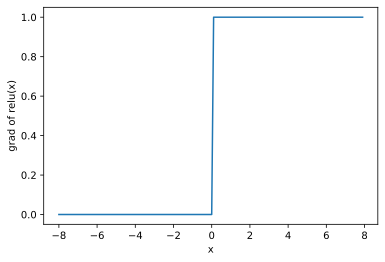

In [17]:
# 常量,求解梯度
y.sum().backward()

# 绘制relue的导数
xyplot(x,x.grad,'grad of relu')

### sigmoid函数

该函数将输入元素的值变换到0到1之间，即该函数的值域为0，1。

sigmoid函数：

$$
sigmoid(x)=\frac{1}{1+exp(-x)}
$$

绘制sigmoid函数图：

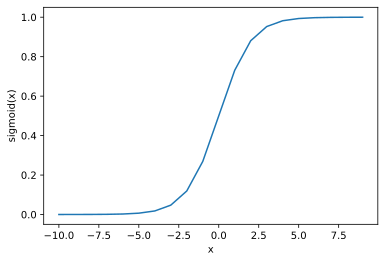

In [25]:
x=torch.arange(-10.0,10.0,1.0,requires_grad=True)

# 调用torch.tensor.sigmoid()
y=x.sigmoid()

xyplot(x,y,'sigmoid')

按照链式求导法则，sigmoid函数的导数:

$$
sigmoid'(x)=sigmoid(x)(1-sigmoid(x))

$$

sigmoid函数的导数变化示例图如下。

当输入越远离0时，导数值越接近0.

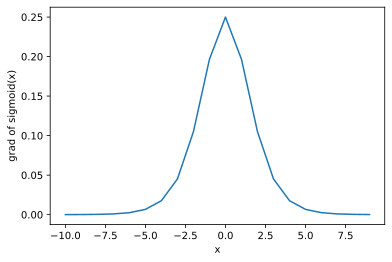

In [26]:
# x梯度清零，使用_表示覆盖到原始数据
# x.grad.zero_()

y.sum().backward()

xyplot(x,x.grad,'grad of sigmoid')

### tanh函数

双曲正切函数，可以将元素的值，变换到-1到1之间。

定义为：

$$
tnah(x)=\frac{1-exp(-2x)}{1+exp(-2x)}
$$

当输入接近0时，tnah函数越接近线性变换。

该函数关于坐标原点对称。



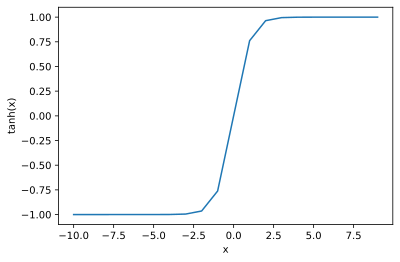

In [27]:
y=x.tanh()

xyplot(x,y,'tanh')

tanh的导数为：

$$
tanh'(x)=1-tanh^2(x)
$$

当输入为0时，tanh函数的导数达到最大值1，x越偏离0，则x_grad值越接近0.

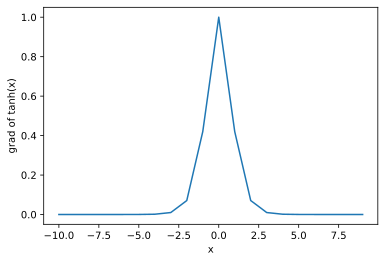

In [29]:
x.grad.zero_()

y.sum().backward()

xyplot(x,x.grad,'grad of tanh')

# 3.9 MLP实现

In [30]:
# 读取数据
import d2l_pytorch as d2l

batch_size=256

train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [34]:
# 定义模型参数：输入层，一层隐藏层，输出层

# 输入 28*28=784表示一张图片
num_inputs=784
# 隐藏层单元个数，设为256个
num_hiddens=256
# 输出，一共10个类别
num_outputs=10

# 输入层与隐藏层之间的参数
W1=torch.tensor(np.random.normal(0,0.01,size=(num_inputs,num_hiddens)),dtype=torch.float)

b1=torch.zeros(num_hiddens,dtype=torch.float)
# 隐藏层与输出层之间的参数
W2=torch.tensor(np.random.normal(0,0.01,size=(num_hiddens,num_outputs)),dtype=torch.float)
b2=torch.zeros(num_outputs,dtype=torch.float)

# 模型参数
params=[W1,b1,W2,b2]
# 参数保留梯度
for param in params:
    param.requires_grad_(requires_grad=True)

In [35]:
# 自定义激活函数(暂时不使用tennsor.relu())

def relu(X):
    return torch.max(input=X,other=torch.tensor(0.0))

## 定义模型

通过view函数将每张原始图像改成长度为num_inputs的向量，

计算输入值与W1的高维矩阵乘积，记为O

使用relu激活函数，计算relu(O)

计算O与W2的高维矩阵乘积，即为网络的输出值


In [36]:
def net(X):
    # X为网络的输入向量
    X=X.view((-1,num_inputs))
    H=relu(torch.matmul(X,W1)+b1)
    return torch.matmul(H,W2)+b2

In [37]:
# 定义损失函数
loss=torch.nn.CrossEntropyLoss()

In [39]:
# 训练模型

num_epochs,lr=5,100.0

d2l.train_ch03(net,train_iter,test_iter,loss,batch_size,num_epochs,params,lr)

epoch 1, loss 0.0030, train acc 0.716,test acc 0.724
epoch 2, loss 0.0019, train acc 0.825,test acc 0.824
epoch 3, loss 0.0017, train acc 0.845,test acc 0.813
epoch 4, loss 0.0015, train acc 0.856,test acc 0.855
epoch 5, loss 0.0015, train acc 0.862,test acc 0.825


# MLP简洁实现


In [1]:
# 导入包
import torch
import torch.nn as nn
from torch.nn import init
import numpy as np
import sys
import d2l_pytorch as d2l

In [2]:
# 定义模型
num_inputs,num_outputs,num_hiddens=784,10,256


In [10]:
# 模型定义,写法一
net1=nn.Sequential()
net1.add_module('flatten',d2l.FlattenLayer())

net1.add_module('linear1', nn.Linear(num_inputs,num_hiddens)) 
net1.add_module('relu',nn.ReLU())

net1.add_module('linear2', nn.Linear(num_hiddens,num_outputs))

# 开启梯度保留
# for param in net.params

# 打印网络
print(net1)

Sequential(
  (flatten): FlattenLayer()
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)


上述写法，每个层，需要传导一个名字参数。

参数的初始化：

```python
# 初始化模型参数
init.normal_(net.linear1.weight,mean=0,std=0.01)
init.constant_(net.linear1.bias,val=0)
```
比较繁琐。

In [3]:
# 模型定义,写法二

net2 = nn.Sequential(
        d2l.FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens, num_outputs), 
        )        

print(net2)

Sequential(
  (0): FlattenLayer()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


In [4]:
net=net2
for param in net.parameters():
    init.normal_(param,mean=0,std=0.01)

In [5]:
# 读取数据，训练模型
# 使用pytorch自带的svg
batch_size=256

# load data
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

# loss
loss=torch.nn.CrossEntropyLoss()

# 更新参数
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)

# training model
num_epochs=5

d2l.train_ch03(net,train_iter,test_iter,loss,batch_size,num_epochs,None,None,optimizer)

epoch 1, loss 0.0031, train acc 0.699,test acc 0.718
epoch 2, loss 0.0019, train acc 0.816,test acc 0.803
epoch 3, loss 0.0017, train acc 0.845,test acc 0.831
epoch 4, loss 0.0015, train acc 0.855,test acc 0.849
epoch 5, loss 0.0014, train acc 0.864,test acc 0.815
